In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [92]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [93]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

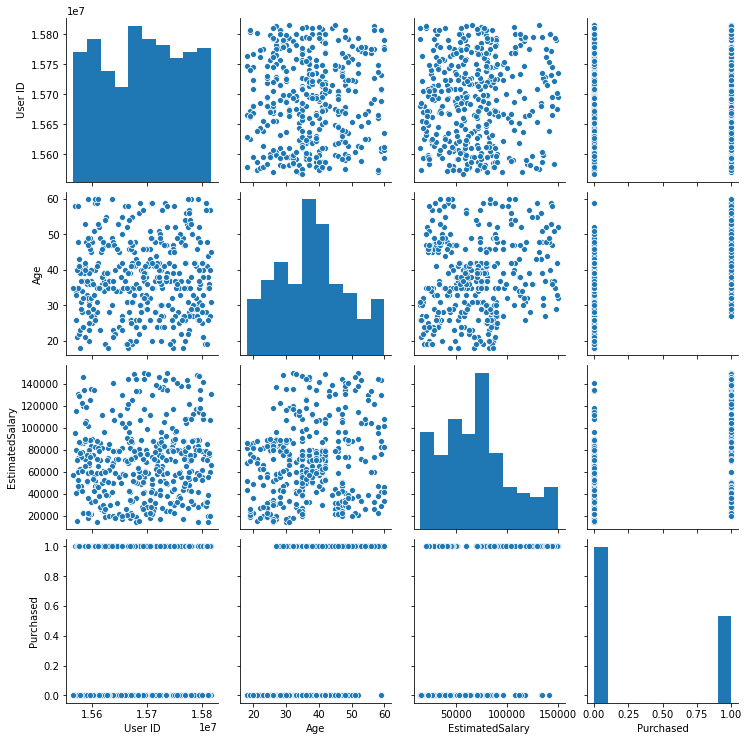

In [94]:
sns.pairplot(df)

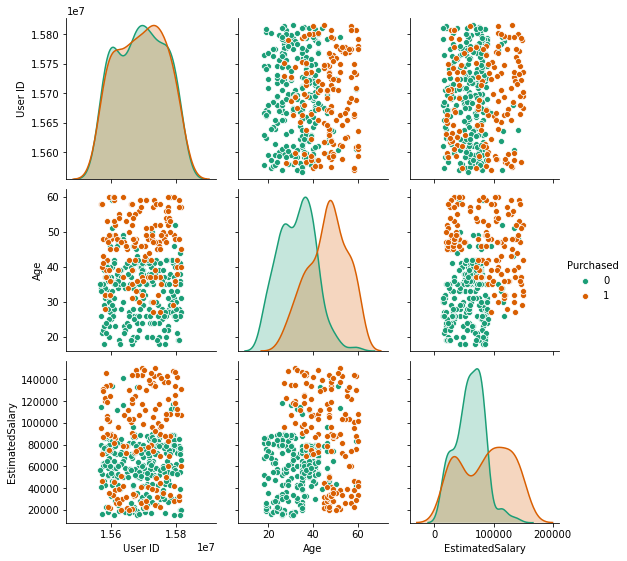

In [95]:
sns.pairplot(df,hue='Purchased',palette='Dark2')

In [96]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [97]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:,-1].values

In [98]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split (x,y,test_size=0.25,random_state=0)


# Classification

In [99]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

from sklearn.metrics import accuracy_score
print(f"Accuracy -: {accuracy_score(ytest,ypred)}")

Accuracy -: 0.83


Accuracy : [0.83, 0.77, 0.78, 0.81, 0.83, 0.84, 0.81, 0.84, 0.84, 0.82, 0.89, 0.84, 0.84, 0.84, 0.86, 0.85, 0.85, 0.84, 0.87, 0.84, 0.85, 0.83, 0.84, 0.84, 0.83, 0.83, 0.79, 0.83, 0.81, 0.83]


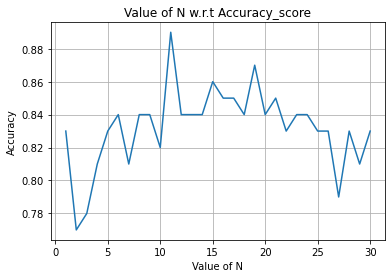

In [100]:
accuracy = []

for i in range(1,31):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(xtrain,ytrain)
  ypred = knn.predict(xtest)
  
  ac=accuracy_score(ytest,ypred)
  accuracy.append(ac)
print('Accuracy :',accuracy)

plt.plot(range(1,31),accuracy)
plt.title('Value of N w.r.t Accuracy_score')
plt.xlabel('Value of N')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [101]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

from sklearn.metrics import accuracy_score
print(f"Accuracy -: {accuracy_score(ytest,ypred)*100}")

Accuracy -: 89.0


In [113]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score (knn,x,y,cv=13,scoring='accuracy')
print (f"Accuracy :{cvs.mean()*100}")
print(f"Standard Deviation :{cvs.std()*100}")

Accuracy :77.94871794871793
Standard Deviation :8.198388330874366


# Regression

In [72]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [73]:
x = df.iloc[:,:-2].values
y = df.iloc[:,-1].values

In [74]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split (x,y,test_size=0.20,random_state=0)

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

from sklearn.metrics import r2_score

print(f"Accuracy -: {r2_score(ytest,ypred)*100}")

Accuracy -: 88.79039067653898


Accuracy : [0.9620745980769433, 0.9442829781028822, 0.9511082861624712, 0.9532660605759286, 0.8879039067653898, 0.8396537532160195, 0.7880478754598934, 0.7290691315804205, 0.7022197840478615, 0.6445929900573052, 0.6013252421836591, 0.6072318033679888, 0.611236587358285, 0.5747538661951589, 0.5229505019327559, 0.5103937673738388, 0.5007794654150985, 0.42370480649158615, 0.39311769474061453, 0.35557189121514177, 0.3332535551701954, 0.3085443924707717, 0.3249248206993356, 0.3008806295096961, 0.2557996932351516, 0.2353959145229979, 0.25717689857929715, 0.2770532679022025, 0.25198878387669965, 0.23318511899199168]


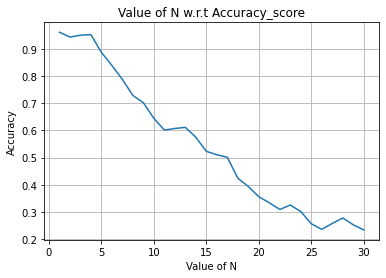

In [75]:
accuracy = []

for i in range(1,31):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(xtrain,ytrain)
  ypred = knn.predict(xtest)
  
  ac=r2_score(ytest,ypred)
  accuracy.append(ac)
print('Accuracy :',accuracy)

plt.plot(range(1,31),accuracy)
plt.title('Value of N w.r.t Accuracy_score')
plt.xlabel('Value of N')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [76]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

from sklearn.metrics import r2_score

print(f"Accuracy -: {r2_score(ytest,ypred)*100}")

Accuracy -: 95.32660605759285


In [77]:
df = pd.read_csv("kyphosis.csv")
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [78]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [79]:
x=df.iloc[:,1:4]
y=df.iloc[:,0]

In [80]:
y

0      absent
1      absent
2     present
3      absent
4      absent
       ...   
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

In [81]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split (x,y,test_size=0.25,random_state=0)

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

from sklearn.metrics import accuracy_score
print(f"Accuracy -: {accuracy_score(ytest,ypred)}")

Accuracy -: 0.7619047619047619


Accuracy : [0.7142857142857143, 0.7619047619047619, 0.6666666666666666, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619]


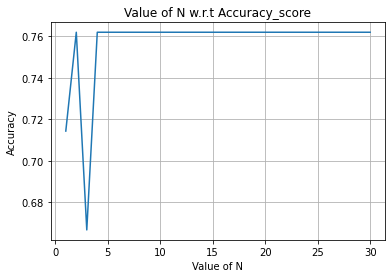

In [83]:
accuracy = []

for i in range(1,31):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(xtrain,ytrain)
  ypred = knn.predict(xtest)
  
  ac=accuracy_score(ytest,ypred)
  accuracy.append(ac)
print('Accuracy :',accuracy)

plt.plot(range(1,31),accuracy)
plt.title('Value of N w.r.t Accuracy_score')
plt.xlabel('Value of N')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

from sklearn.metrics import accuracy_score
print(f"Accuracy -: {accuracy_score(ytest,ypred)}")

Accuracy -: 0.7619047619047619


In [85]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score (knn,x,y,cv=16,scoring='accuracy')
print (f"Accuracy :{cvs.mean()*100}")
print(f"Standard Deviation :{cvs.std()*100}")

Accuracy :77.91666666666667
Standard Deviation :9.042722672587795


In [86]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [87]:
x=df.iloc[:,:-2]
y=df.iloc[:,-2]

In [88]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [89]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split (x,y,test_size=0.3,random_state=0)

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

from sklearn.metrics import r2_score

print(f"Accuracy -: {r2_score(ytest,ypred)*100}")

Accuracy -: 53.25589834474355


Accuracy : [0.259791817898097, 0.43512221899488457, 0.48534676707527447, 0.5048535188152368, 0.5325589834474355, 0.5497306273316096, 0.5565106403339375, 0.5619147217055183, 0.5649538889830693, 0.5699031872648896, 0.5703082051430499, 0.5718603979693293, 0.5766127086609744, 0.5770755674081156, 0.5765327748917585, 0.5785946691863577, 0.5789454210639005, 0.5790347779058523, 0.5789410689356769, 0.5799224687360927, 0.579379961000183, 0.5805879386490127, 0.5818863807009922, 0.5841560868213378, 0.5858538907532345, 0.5848185776472112, 0.5862401779480575, 0.5864540954821523, 0.5870552652967205, 0.5875795100713841]


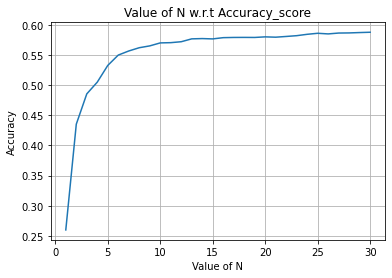

In [90]:
accuracy = []

for i in range(1,31):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(xtrain,ytrain)
  ypred = knn.predict(xtest)
  
  ac=r2_score(ytest,ypred)
  accuracy.append(ac)
print('Accuracy :',accuracy)

plt.plot(range(1,31),accuracy)
plt.title('Value of N w.r.t Accuracy_score')
plt.xlabel('Value of N')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [91]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=30)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

from sklearn.metrics import r2_score

print(f"Accuracy -: {r2_score(ytest,ypred)*100}")

Accuracy -: 58.75795100713841
